In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error, r2_score,mean_squared_error

In [260]:
pwd

'D:\\FINGERTIPS DATA SCIENCE\\READING MATERIALS\\PROJECTS\\PYTHON\\PROJECT- 1 Python Linear Regression Employee Salary Analysis'

In [261]:
cd D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON\PROJECT- 1 Python Linear Regression Employee Salary Analysis

D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON\PROJECT- 1 Python Linear Regression Employee Salary Analysis


In [262]:
# 1) Load the given dataset
df = pd.read_csv("Python_Linear_Regres.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


# Part-1: data Exploration and Pre-processing

In [221]:
# 2) Fill Null value of experience column with the value 0
df['experience'] = df['experience'].fillna('0')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [222]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [223]:
# 3) Replace the Null values of the column test score with mean value
t1=df['test_score(out of 10)'].mean()
t1

7.857142857142857

In [224]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(t1)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [225]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [226]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [227]:
df['experience']=pd.to_numeric(df['experience'],errors='coerce')

In [228]:
df['experience']

0     0.0
1     0.0
2     5.0
3     2.0
4     7.0
5     3.0
6    10.0
7    11.0
Name: experience, dtype: float64

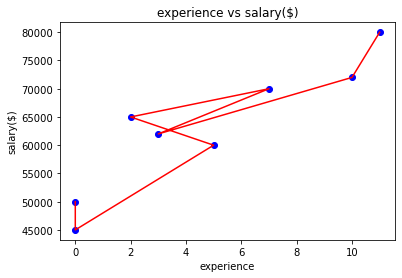

In [229]:
# 4) Display a scatter plot between experience and Salary
x=df['experience']
z=df['salary($)']
plt.xlabel('experience')
plt.ylabel('salary($)')
plt.title('experience vs salary($)' )
plt.scatter(x,z,color='blue')
plt.plot(x,z,color='red')

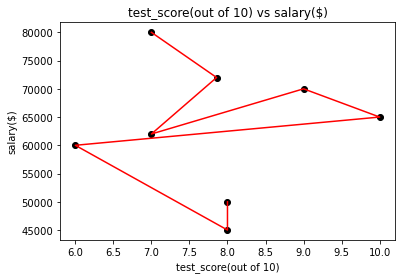

In [230]:
# 5) Display a scatter plot between test score and Salary
t=df['test_score(out of 10)']
s=df['salary($)']

plt.xlabel('test_score(out of 10)')
plt.ylabel('salary($)')
plt.title('test_score(out of 10) vs salary($)')
plt.scatter(t,s,color='black')
plt.plot(t,s,color="red");

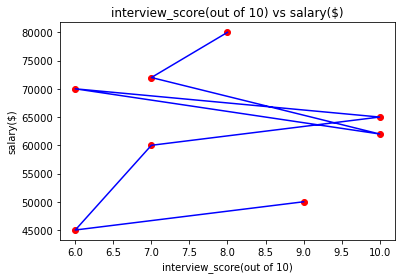

In [231]:
# 6) Display a scatter plot between interview score and Salary
i=df['interview_score(out of 10)']
s=df['salary($)']
plt.xlabel('interview_score(out of 10)')
plt.ylabel('salary($)')
plt.title('interview_score(out of 10) vs salary($)')

plt.scatter(i,s,color='red')
plt.plot(i,s,color='blue');

In [66]:
# 7) Display bar plot for experience

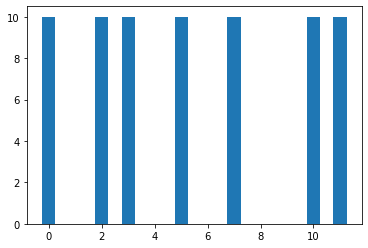

In [232]:
# e=df['experience']
# plt.bar(df['experience'],height=0.5)
plt.bar(df['experience'],height=10,width=0.5)
plt.show()

# Part-2: Working with Model

In [233]:
# 1) Separate feature data from target data
x=df[['experience','test_score(out of 10)','interview_score(out of 10)']]
# x=df.drop('salary($)',axis=1)
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0.0,8.000000,9
1,0.0,8.000000,6
2,5.0,6.000000,7
3,2.0,10.000000,10
4,7.0,9.000000,6
5,3.0,7.000000,10
6,10.0,7.857143,7
7,11.0,7.000000,8


In [234]:
x.shape

(8, 3)

In [332]:
# df['experience']=pd.to_numeric(df['experience'],errors='coerce')

In [235]:
type(df['experience'][7])

numpy.float64

In [236]:
df.dtypes

experience                    float64
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [237]:
y=df[['salary($)']]
y

,salary($)
0,50000
1,45000
2,60000
3,65000
4,70000
5,62000
6,72000
7,80000


In [238]:
y.shape

(8, 1)

In [239]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.5,random_state=0)

In [240]:
x_train

,experience,test_score(out of 10),interview_score(out of 10)
3,2.0,10.0,10
0,0.0,8.0,9
5,3.0,7.0,10
4,7.0,9.0,6


In [241]:
x_test

,experience,test_score(out of 10),interview_score(out of 10)
6,10.0,7.857143,7
2,5.0,6.000000,7
1,0.0,8.000000,6
7,11.0,7.000000,8


In [242]:
y_train

,salary($)
3,65000
0,50000
5,62000
4,70000


In [243]:
y_test

,salary($)
6,72000
2,60000
1,45000
7,80000


In [244]:
# 2) Create a Linear regression model between Features and target data
regression_model=LinearRegression()

In [245]:
regression_model.fit(x_train,y_train)

LinearRegression()

In [246]:
# 3) Display the test score and training score
x_train

,experience,test_score(out of 10),interview_score(out of 10)
3,2.0,10.0,10
0,0.0,8.0,9
5,3.0,7.0,10
4,7.0,9.0,6


In [247]:
x_test

,experience,test_score(out of 10),interview_score(out of 10)
6,10.0,7.857143,7
2,5.0,6.000000,7
1,0.0,8.000000,6
7,11.0,7.000000,8


In [248]:
y_train

,salary($)
3,65000
0,50000
5,62000
4,70000


In [249]:
y_test

,salary($)
6,72000
2,60000
1,45000
7,80000


In [250]:
predicted_price=regression_model.predict(x_test)
predicted_price

array([[81677.01863354],
       [58565.2173913 ],
       [41260.86956522],
       [86434.7826087 ]])

In [251]:
regression_model.score(x_test,y_test)

0.7831491720163724

In [252]:
regression_model.score(x_train,y_train)

1.0

In [253]:
# 4) Extract slope and intercept value from the model
print('slope = ',regression_model.coef_)

slope =  [[3782.60869565 2260.86956522 2913.04347826]]


In [254]:
print('intercept value = ',regression_model.intercept_)

intercept value =  [5695.65217391]


In [255]:
# 5) Display Mean Squared Error
mse=mean_squared_error(y_test,predicted_price)
print('Mean sqared value = ',mse)

Mean sqared value =  37772703.599398136


In [256]:
# 6) Display Mean Absolute Error
mae =mean_absolute_error(y_test,predicted_price)
print('Mean Absolute Error = ',mae)

Mean Absolute Error =  5321.428571428569


In [257]:
# 7) Display Root mean Squared error
rmse=np.sqrt(mean_squared_error(y_test,predicted_price))
print('Root mean Suared error = ',rmse)

Root mean Suared error =  6145.9501787273


In [258]:
# 8) Display R2 score
R2 = r2_score(y_test,predicted_price)
print(R2)

0.7831491720163724
